# Detecção de Fraude no Cartão de Crédito

### Indice

1. Introdução
2. Análise Exploratória
3. Preparação e Modelagem dos Dados
4. Resultados e Conclusões
5. Referências

***

## Introdução

Nos dias atuais em meio à evolução dos meios digitais o número de transações feitas por meio destes canais tem aumentado ano após anos. Com esse aumento temos que elevar técnicas de segurança, a medida que fraudes são cada vez mais recorrentes nesses canais.
O objetivo deste trabalho é explorar alguns métodos de detecção de fraude com o intúito de verificar a prova de conceito dos métodos e suas características na aplicação de soluções junto ao negócio.

***

## Análise Exploratória

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Configurações necessárias
pd.set_option('display.max_columns', None)

In [2]:
# importando os dados necessários para um pandas dataframe
# A base está no item 6 da referência

df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [12]:
# Tipos das variáveis e se há nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Estatística básica das variáveis
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* Transações com valor zerado

In [9]:
len(df[df.Amount == 0])

1825

* Quantas fraudes há no dataset (Variável "Classe")?

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Conclusões Parciais

A pricípio, um ponto importante a ser considerado no conjunto de dados é que para proteção dos dados dos cliente uma primeira transformação nos dados foi feita e o que temos são os 28 componentes principais desta transfomação (com adição da coluna 'Amount', que representa o valor da transação e a coluna 'Time', que representa o delta T daquela linha para a primeira transação no conjunto de dados).

Uma rápida análise nas distribuições dos dados podemos notar que a coluna que traz o valor da transação aparece zerada em algumas linhas e isso terá de ser tratado, uma vez que transações zeradas podem representar falhas na leitura da transação e mesmo podendo inferir este valor (substituição pela média, entre outras técnicas) vamos tentar não carregar um erro, a princípio, para as próximas etapas.

Por fim podemos notar que não só pela origem do problema, mas também pela própria coluna 'Class', os dados estão muito desbalanceados, a medida que o evento fraude é extremamente raro em meio a diversas transações, o que pode causar problemas em técnicas de classificação.

***

## Preparação e Modelagem dos Dados

In [42]:
# bibliotecas necessárias para a modelagem dos dados
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [16]:
# A princípio vamos apenas retirar as transações que tem valor zerado

df = df[df.Amount != 0]

In [17]:
# Quebrando o dataframe em treino e teste (70% treino e 30% teste).

X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

* Baseline model


Aqui precisamos de um modelo básico para comparação com outras técnicas. O modelo escolhido foi a regressão logística.

In [18]:
# Criando o modelo e treinando com os dados de treino
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
# Calculando o roc auc score para os dados de treino e teste
print(roc_auc_score(y_train, clf.predict(X_train)))
print(roc_auc_score(y_test, clf.predict(X_test)))

0.8069239890289329
0.8089018022134168


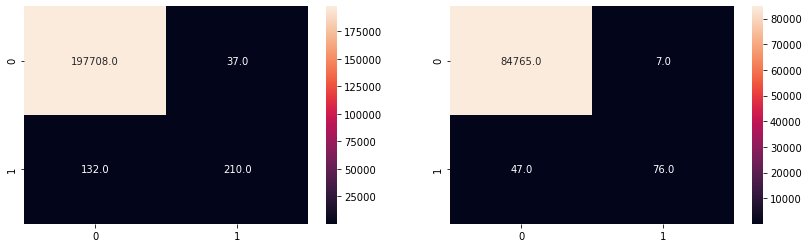

In [20]:
# Plotando a matriz confusão para treino e teste para verificar quantos TP e FP foram encontrados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

sn.heatmap(confusion_matrix(y_train, clf.predict(X_train)), 
           annot=True, fmt='.1f', ax = ax[0])

sn.heatmap(confusion_matrix(y_test, clf.predict(X_test)), 
           annot=True, fmt='.1f', ax = ax[1])

* Random Forest

In [43]:
rf_clf = RandomForestClassifier(n_estimators=500,
                             max_depth=8, 
                             random_state=0).fit(X_train, y_train)

In [44]:
# Calculando o roc auc score para os dados de treino e teste
print(roc_auc_score(y_train, rf_clf.predict(X_train)))
print(roc_auc_score(y_test, rf_clf.predict(X_test)))

0.9035087719298245
0.8902085133954724


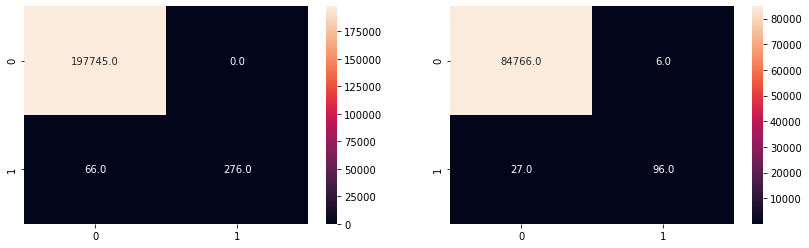

In [45]:
# Plotando a matriz confusão para treino e teste para verificar quantos TP e FP foram encontrados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

sn.heatmap(confusion_matrix(y_train, rf_clf.predict(X_train)), 
           annot=True, fmt='.1f', ax = ax[0])

sn.heatmap(confusion_matrix(y_test, rf_clf.predict(X_test)), 
           annot=True, fmt='.1f', ax = ax[1])

* Reconstrução do Erro com PCA

Aqui a idéia é transformarmos mais um vez o consjunto de dados visando uma variancia explicada de 95% (deixando o algoritmo dizer o melhor número de componentes para representar os dados), assim aplicamos a transformação inversa para reconstruir os dados e por fim calculamos o MSE (Mean Square Error) de cada ponto para detecção das anomalias. Aqui o threshold adotado é o intervalo de desvios padrões da média que minimiza a quantidade de FPs nas predições.

In [36]:
#Instanciando o PCA do sklearn
pca = PCA(n_components=0.95)

In [37]:
# Aplicando a transformação do PCA nos dados
df_reduced = pca.fit_transform(X_train)
# Aplicando a reconstrução das componentes principais
df_inv = pd.DataFrame(pca.inverse_transform(df_reduced), columns=X_train.keys())
# Calculando o MSE de cada ponto da base de treino
result = pd.DataFrame(np.sqrt(np.sum(np.asarray(X_train.values - df_inv.values)**2, axis=1)))
result['Class'] = y_train.values.tolist()
# Calculando a média e o Desvio padrão da classe majoritária
mean_zero = result[result.Class == 0][0].mean()
std_zero = result[result.Class == 0][0].std()
# Aplicando a predição de fraud para dados maiores que a média mais um intervalo de desvio padrão
result['predicted'] = result[0].apply(lambda x: 1 if (x > mean_zero + std_zero) else 0)

In [38]:
# Distribuição do MSE de cada classe
display(result[result.Class == 1].describe())
display(result[result.Class == 0].describe())

,0,Class,predicted
count,342.000000,342.0,342.000000
mean,23.246988,1.0,0.871345
std,16.813153,0.0,0.335308
min,2.986236,1.0,0.000000
25%,10.943984,1.0,1.000000
50%,17.751074,1.0,1.000000
75%,37.505295,1.0,1.000000
max,90.072380,1.0,1.000000


,0,Class,predicted
count,197745.000000,197745.0,197745.000000
mean,4.648046,0.0,0.058489
std,2.467659,0.0,0.234667
min,2.022649,0.0,0.000000
25%,3.431861,0.0,0.000000
50%,4.198057,0.0,0.000000
75%,5.182996,0.0,0.000000
max,153.269930,0.0,1.000000


In [39]:
# Refazemos todo o processo para a base de teste. Agora vamos apenas transformar os dados e não retreinar o PCA
df_reduced_test = pca.transform(X_test)
df_inv_test = pd.DataFrame(pca.inverse_transform(df_reduced_test), columns=X_test.keys())
result_test = pd.DataFrame(np.sqrt(np.sum(np.asarray(X_test.values - df_inv_test.values)**2, axis=1)))
result_test['Class'] = y_test.values.tolist()

mean_zero_test = result_test[result_test.Class == 0][0].mean()
std_zero_test = result_test[result_test.Class == 0][0].std()

result_test['predicted'] = result_test[0].apply(lambda x: 1 if (x > mean_zero_test + 1 * std_zero_test) else 0)

In [40]:
# Calculando o roc score para os dados de treino e teste
print("ROC AUC SCORE TREINO: ", roc_auc_score(result.Class, result.predicted))
print("ROC AUC SCORE TESTE: ", roc_auc_score(result_test.Class, result_test.predicted))

ROC AUC SCORE TREINO:  0.906427780239747
ROC AUC SCORE TESTE:  0.9201066447388864


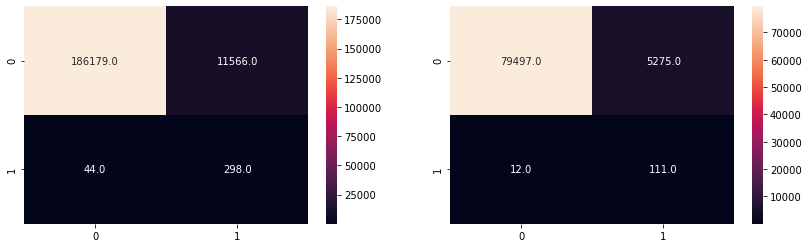

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

sn.heatmap(confusion_matrix(result.Class, result.predicted), 
           annot=True, fmt='.1f', ax = ax[0])

sn.heatmap(confusion_matrix(result_test.Class, result_test.predicted), 
           annot=True, fmt='.1f', ax = ax[1])

***

# Resultados e Conclusões

Para a avaliação dos dados foi escolhida a métrica ROC AUC (Area Under the Receiver Operating Characteristic) e os dados obtidos de cada medição, no treino e no teste pode ser visto na tabela a seguir:

|Classificador|Score no Treino|Socore no Teste|
|-|-|-|
|Regressão Logística|0.807|0.809|
|Random Forest|0.903|0.890|
|Reconstrução do Erro com PCA|0.906|0.920|

***

# Referências

1. [PCA-Based Outlier Detection](https://ieeexplore.ieee.org/abstract/document/4907305?casa_token=w9MUoiiYek0AAAAA:fesefux_fHbeYovRlIdo7iGaM7sZ4yNOXVv4VCdtKCc_8WoaE6cDzu4pUQq3OGXG889Ot57Pf4OcFQ)

2. [Question in stackexchange: Anomaly detection using PCA reconstruction error](https://stats.stackexchange.com/questions/259806/anomaly-detection-using-pca-reconstruction-error)

3. [A Survey on Outlier Detection Techniques for Credit Card Fraud Detection](https://www.semanticscholar.org/paper/A-Survey-on-Outlier-Detection-Techniques-for-Credit-Pawar-Kalavadekar/863e77593b9c3abed4d83348e2dc898a0bd9e850?p2df)

4. [sklearn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

5. [PCA — how to choose the number of components?](https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/)

6. [Kaggle Credit Cart Fraud Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud)